# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [10]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#quite warning
import warnings


# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [11]:
crops['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<Axes: ylabel='count'>

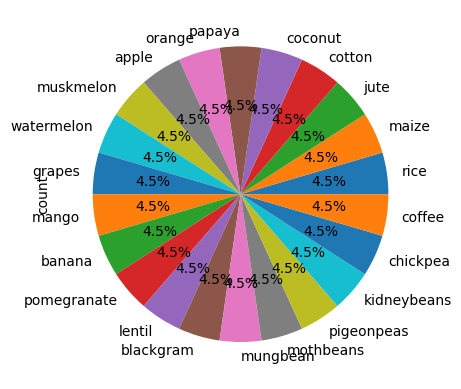

In [23]:
#plot the crop distribution using pie chart
import matplotlib.pyplot as plt
crops['crop'].value_counts().plot.pie(autopct='%1.1f%%')

In [12]:
X = crops.drop(columns='crop')
y = crops['crop']

In [13]:
X

,N,P,K,ph
0,90,42,43,6.502985
1,85,58,41,7.038096
2,60,55,44,7.840207
3,74,35,40,6.980401
4,78,42,42,7.628473
...,...,...,...,...
2195,107,34,32,6.780064
2196,99,15,27,6.086922
2197,118,33,30,6.362608
2198,117,32,34,6.758793


In [14]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: crop, Length: 2200, dtype: object

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
feature_performance = {}

In [18]:
#quite warning
warnings.filterwarnings("ignore")
# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(multi_class="multinomial")
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    
    # Calculate F1 score, the harmonic mean of precision and recall
    # Could also use balanced_accuracy_score
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    
    # Add feature-f1 score pairs to the dictionary
    feature_performance[feature] = f1
    print(f"F1-score for {feature}: {f1}")
    

F1-score for N: 0.09149868209906838
F1-score for P: 0.14761942909728204
F1-score for K: 0.23896974566001802
F1-score for ph: 0.04532731061152114


<BarContainer object of 4 artists>

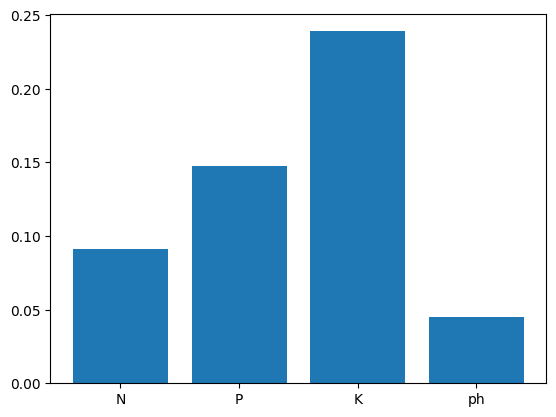

In [20]:
#plot the feature performance
import matplotlib.pyplot as plt

plt.bar(feature_performance.keys(), feature_performance.values())

In [21]:
best_predictive_feature ={'K':feature_performance['K']}
best_predictive_feature

{'K': 0.23896974566001802}

In [2]:
#save this file notebook as a .py file
!jupyter nbconvert --to script notebook.ipynb

[NbConvertApp] Converting notebook notebook.ipynb to script
[NbConvertApp] Writing 3471 bytes to notebook.py
